# Income Analysis

https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance

https://www.kaggle.com/kslarwtf/income-eda

https://www.kaggle.com/dinhkhactuananh/dktuananh-income-classification

https://www.kaggle.com/hoaithuong1903/income-classification

## Features in the dataset

Feature | Description
--------|------------
ID | ID of each value
age | Age
work_type | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
final_weight | Final Weight
education | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
total_education_yrs | Total education years
marital_status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
job | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
status | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
sex | M/F
capital_gain | Capital gain beyond salary
capital_loss | Capital loss beyond salary
hrs_per_week | Working hours per week
native_country | US, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
target_income | 0: <= 50k, 1: > 50k

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
PATH = '/content/drive/My Drive/Colab Notebooks/Projects/Income Analysis & Classification/income_evaluation.csv'

df = pd.read_csv(PATH)

In [8]:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


In [10]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561,NaN,NaN,NaN,38.5816,13.6404,17,28,37,48,90
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561,NaN,NaN,NaN,189778,105550,12285,117827,178356,237051,1.48470e+06
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561,NaN,NaN,NaN,10.0807,2.57272,1,9,10,12,16
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Notes about NULL inspired by https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Notes about ASSERT inspired by https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance

In [17]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

In [18]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [19]:
initial_eda(df)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64    

In [30]:
def initial_EDA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [31]:
initial_EDA(df)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type  #Distinct  NA Values
                                   age      int64         73          0
                             workclass     object          9          0
                                fnlwgt      int64      21648          0
                             education     object         16          0
                         education_num      int64         16          0
                        marital_status     object          7          0
                            occupation     object         15          0
                          relationship     object          6          0
                                  race     object          5          0
                                   sex     object          2          0
                          capital_gain      int64        119          0
                          capital_loss      int64         92          0
       

In [32]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [33]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [34]:
for var in categorical: 
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [35]:
for var in categorical:
     print(df[var].value_counts()/np.float(len(df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

In [36]:
# check for missing values
df['income'].isnull().sum()

0

In [37]:
# view number of unique values
df['income'].nunique()

2

In [38]:
# view the unique values
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [39]:
# view the frequency distribution of values
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [40]:
# view percentage of frequency distribution of values
df['income'].value_counts()/len(df)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

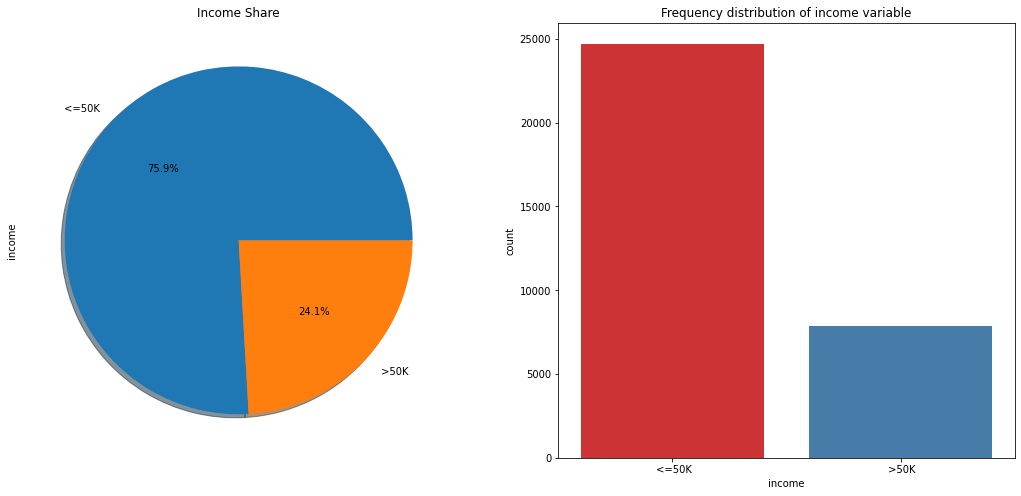

In [42]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

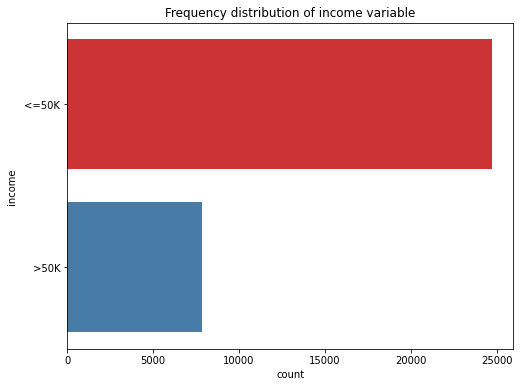

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable")
plt.show()

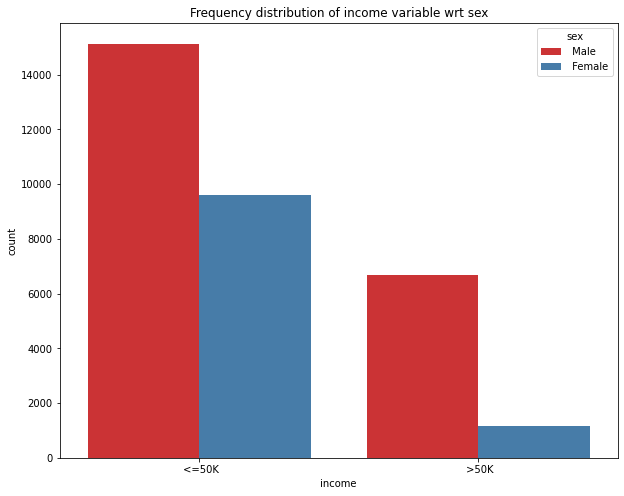

In [44]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

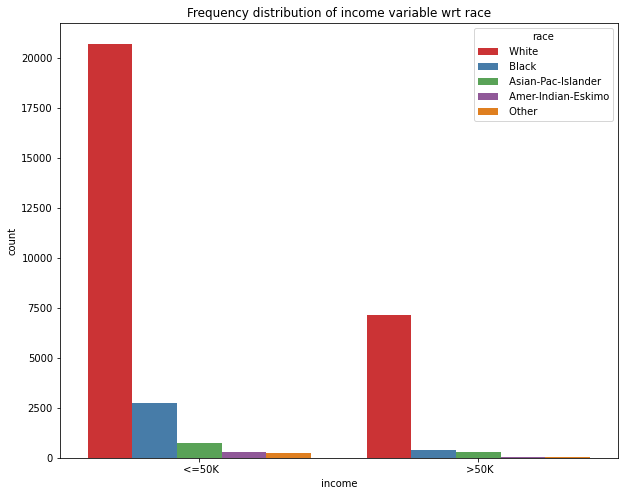

In [45]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

In [46]:
# check number of unique labels 
df.workclass.nunique()

9

In [47]:
# view the unique labels
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [48]:
# view frequency distribution of values
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [49]:
# replace '?' values in workclass variable with `NaN`
df['workclass'].replace(' ?', np.NaN, inplace=True)

In [50]:
# again check the frequency distribution of values in workclass variable
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

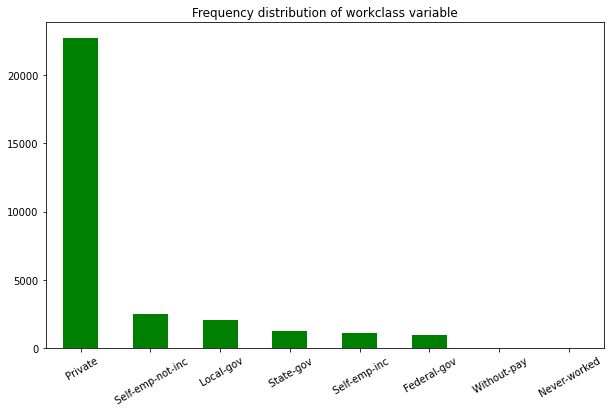

In [51]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

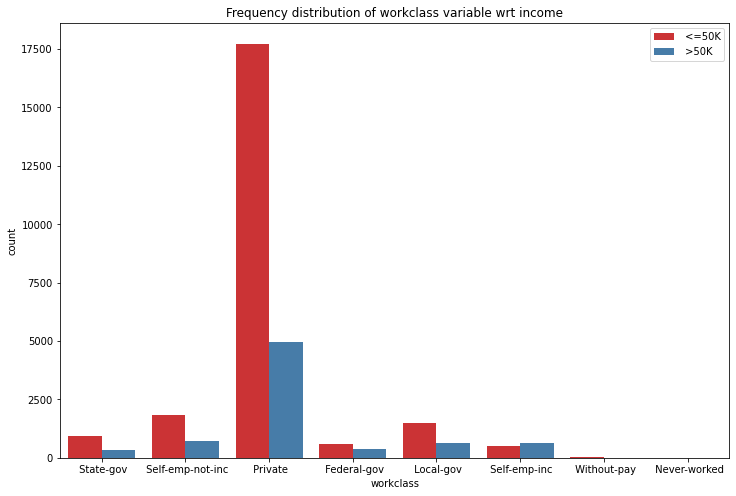

In [52]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

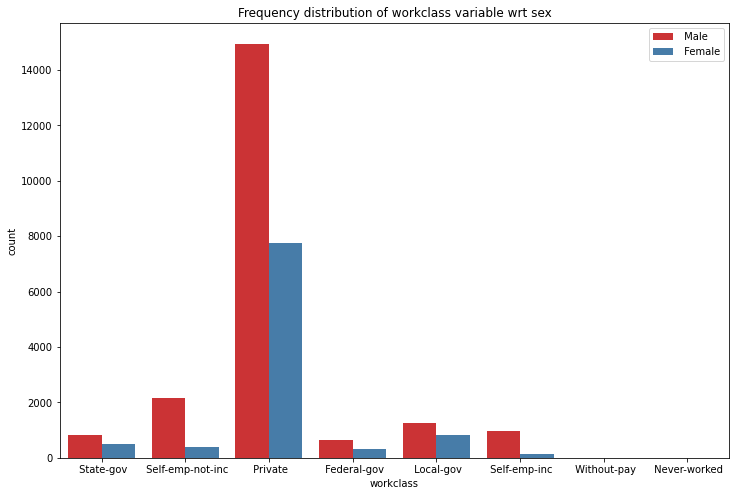

In [53]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

In [54]:
# check number of unique labels

df.occupation.nunique()

15

In [55]:
# view unique labels

df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [56]:
# view frequency distribution of values

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [57]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace(' ?', np.NaN, inplace=True)

In [58]:
# again check the frequency distribution of values

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

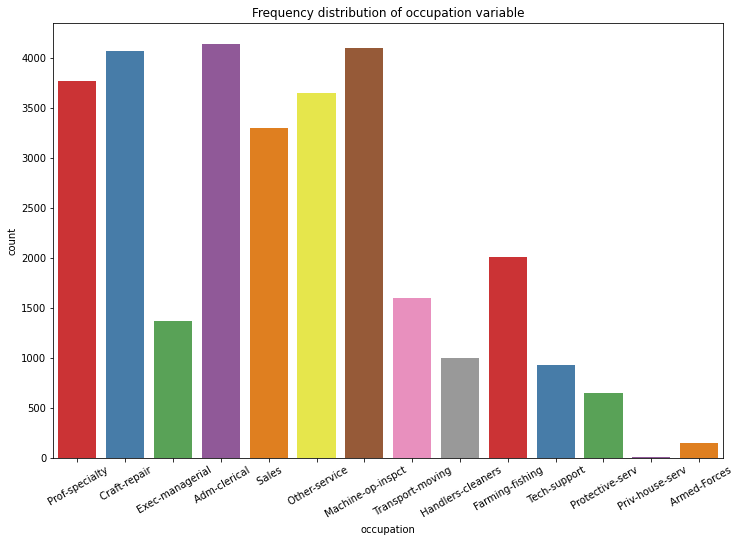

In [59]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=df, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

In [60]:
# check number of unique labels
df.native_country.nunique()

42

In [61]:
# view unique labels 
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [62]:
# check frequency distribution of values
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [63]:
# replace '?' values in native_country variable with `NaN`
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [64]:
# again check the frequency distribution of values
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

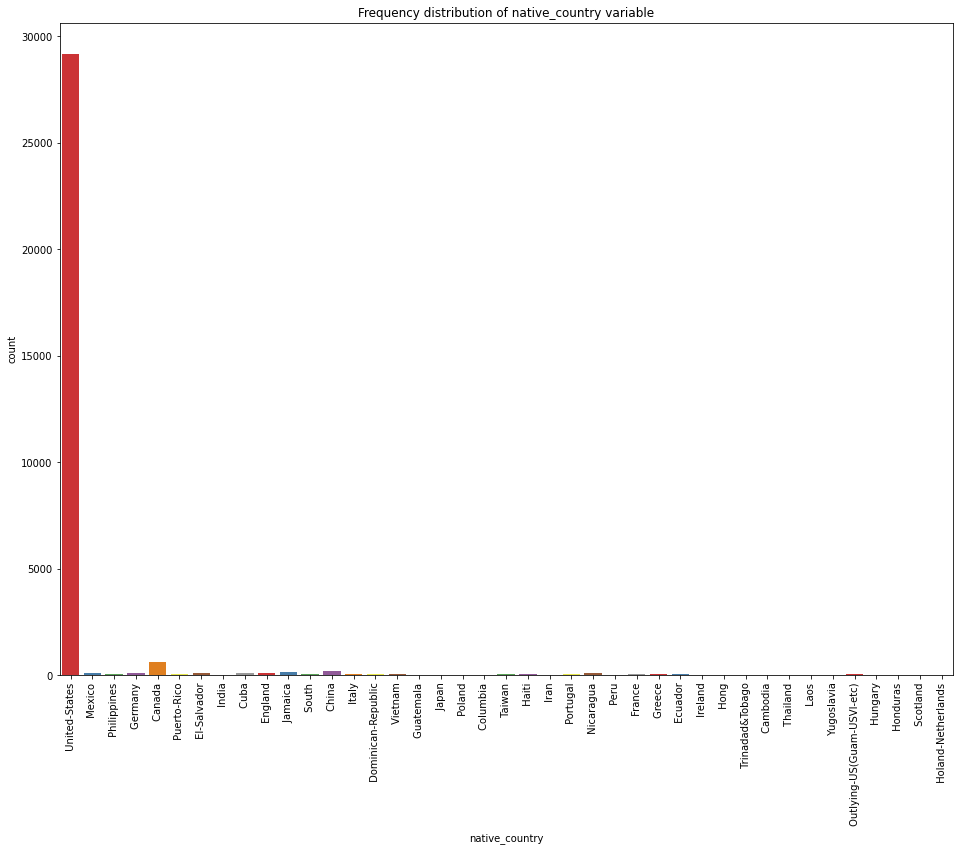

In [65]:
# visualize frequency distribution of `native_country` variable
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="native_country", data=df, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)
plt.show()

In [66]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [67]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [69]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [70]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [71]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [72]:
df['age'].nunique()

73

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


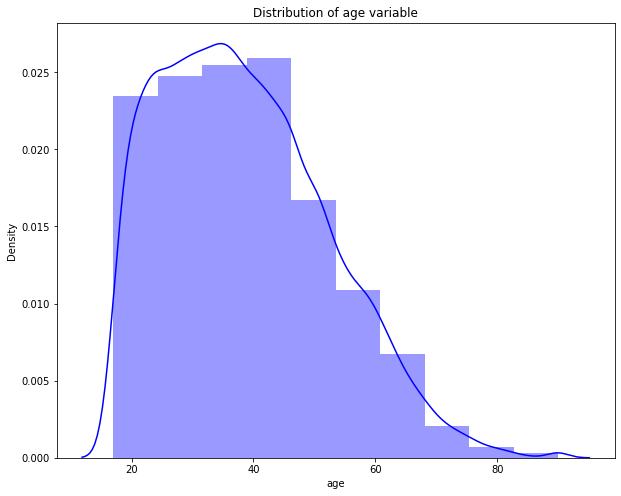

In [73]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


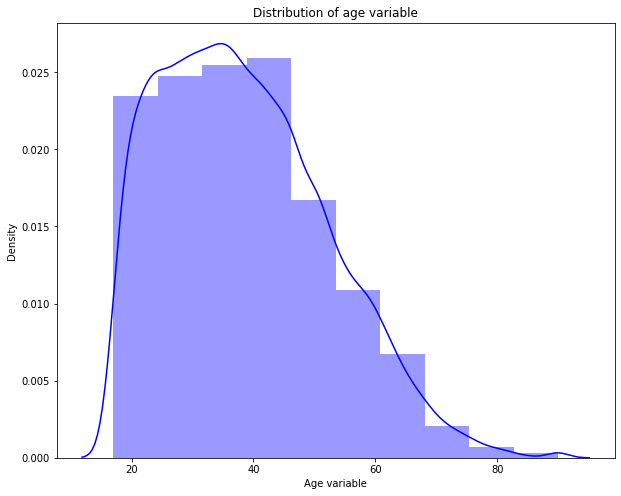

In [74]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

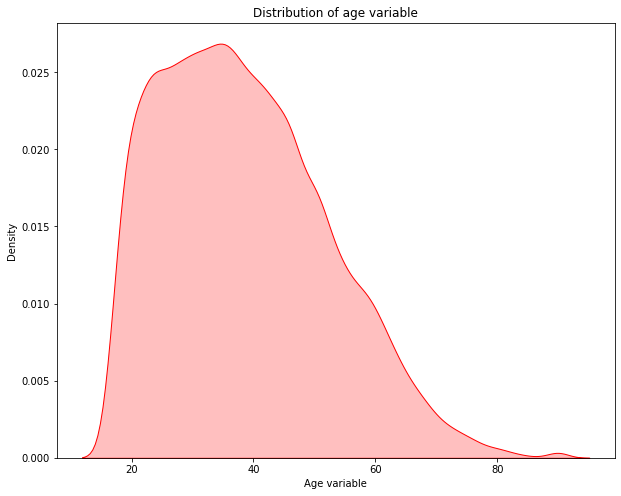

In [75]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


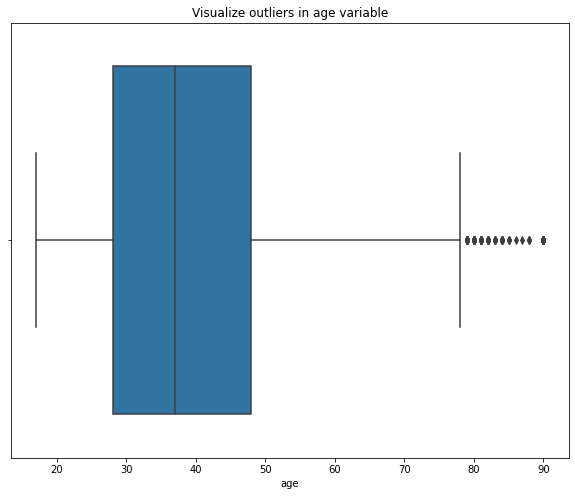

In [76]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

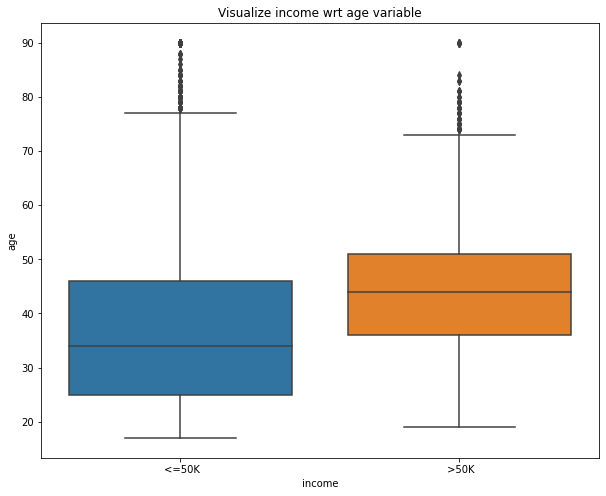

In [77]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

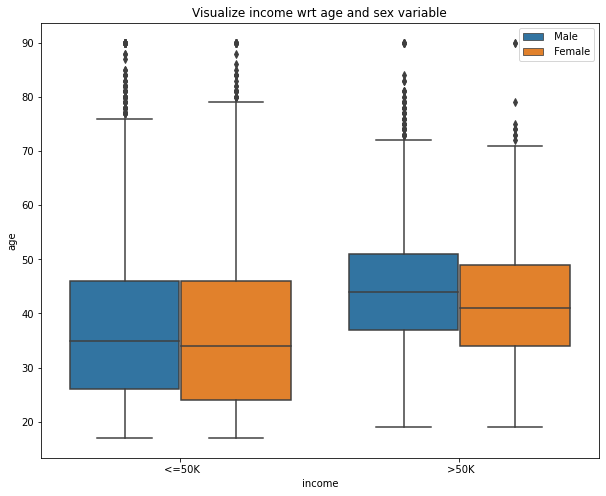

In [78]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

<Figure size 576x432 with 0 Axes>

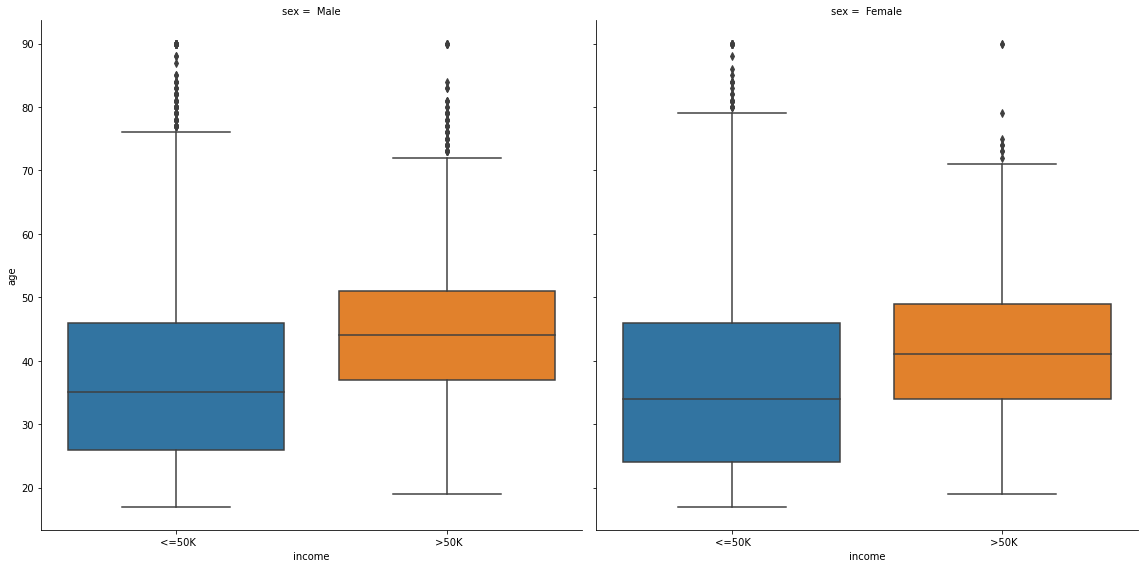

In [79]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
plt.show()

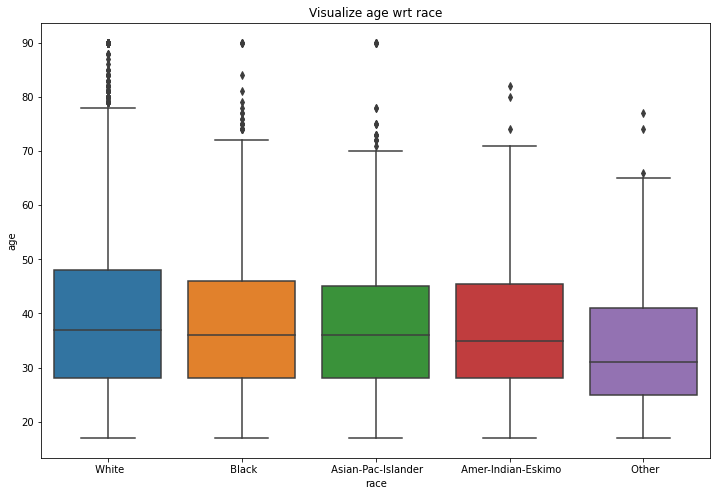

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = df)
plt.title("Visualize age wrt race")
plt.show()

In [81]:
# plot correlation heatmap to find out correlations
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


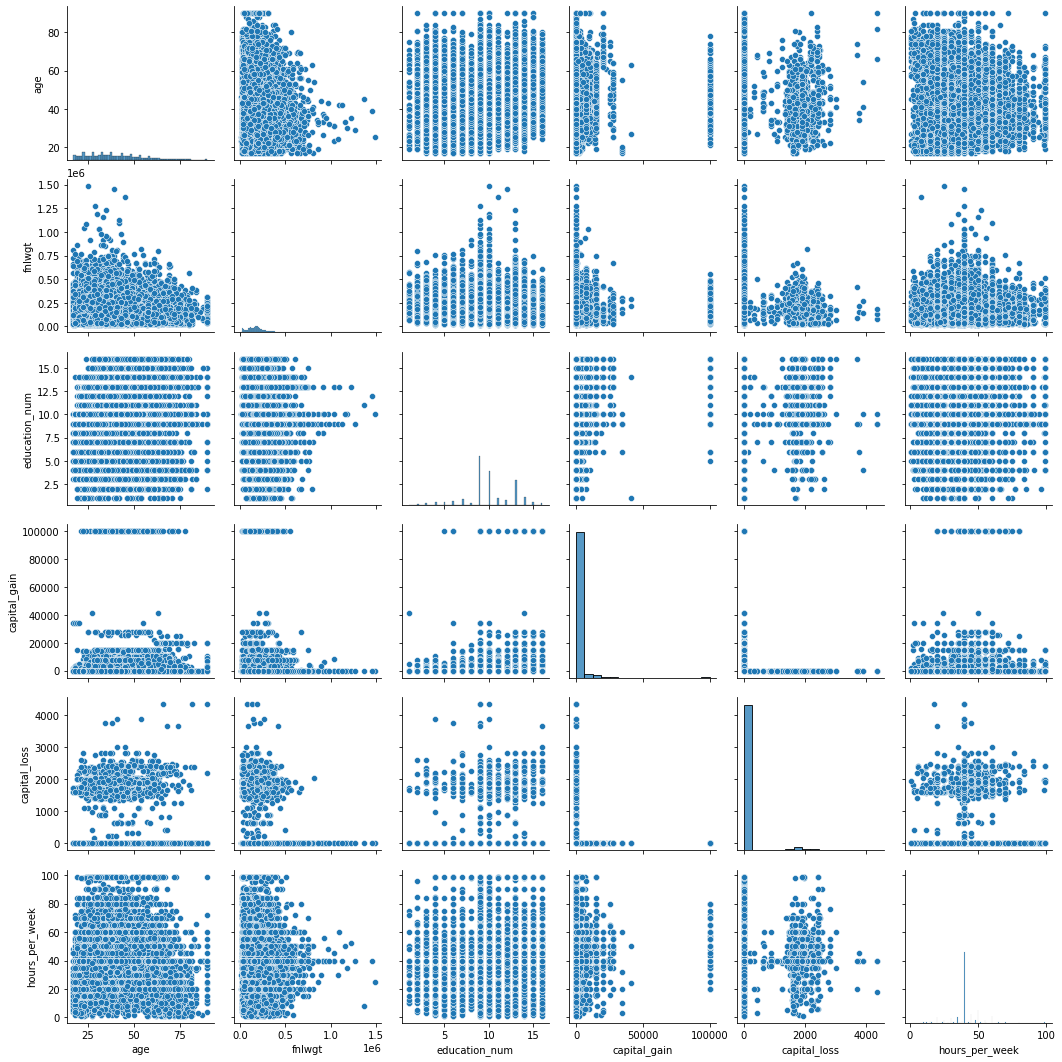

In [82]:
sns.pairplot(df)
plt.show()

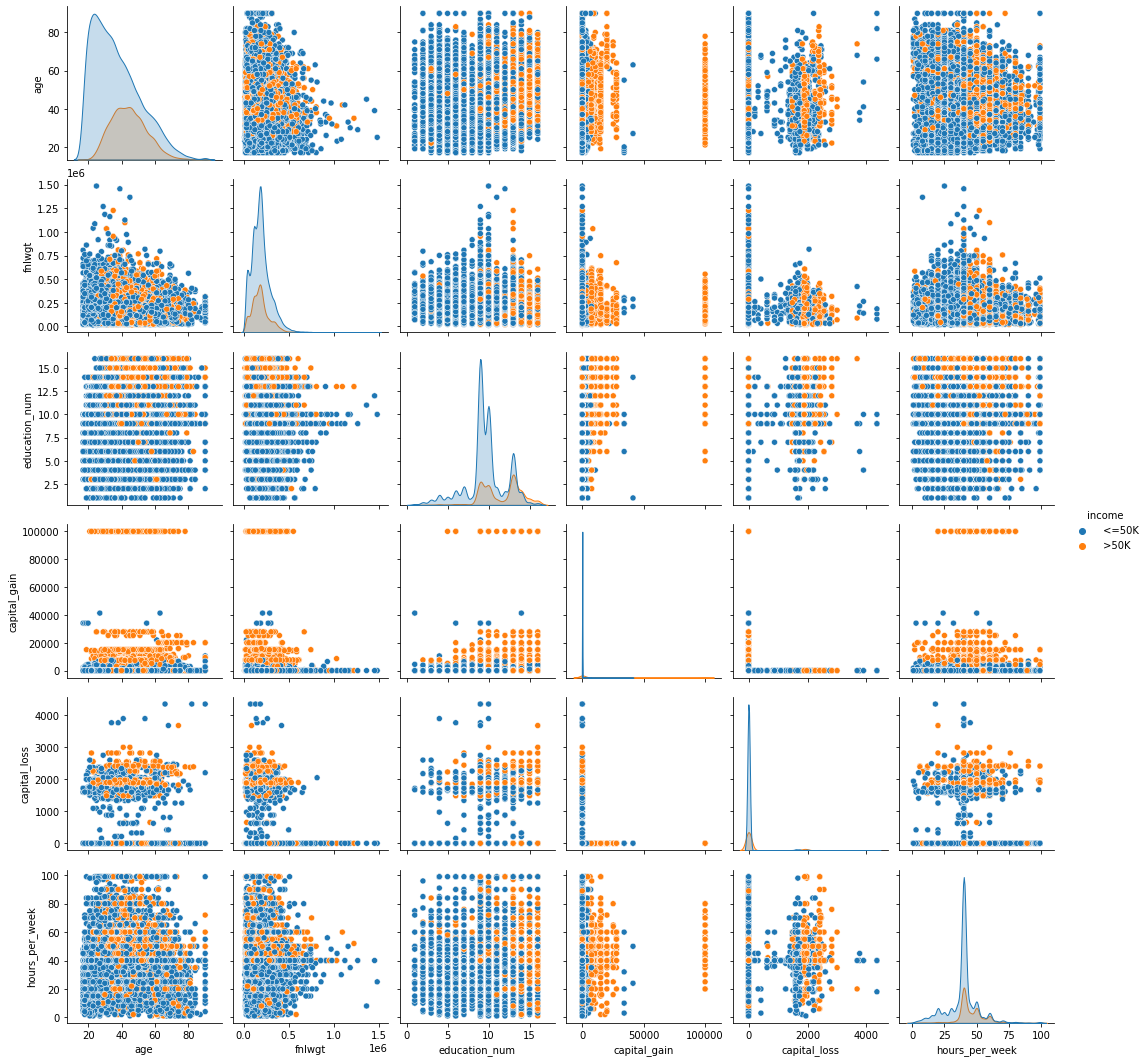

In [83]:
sns.pairplot(df, hue="income")
plt.show()

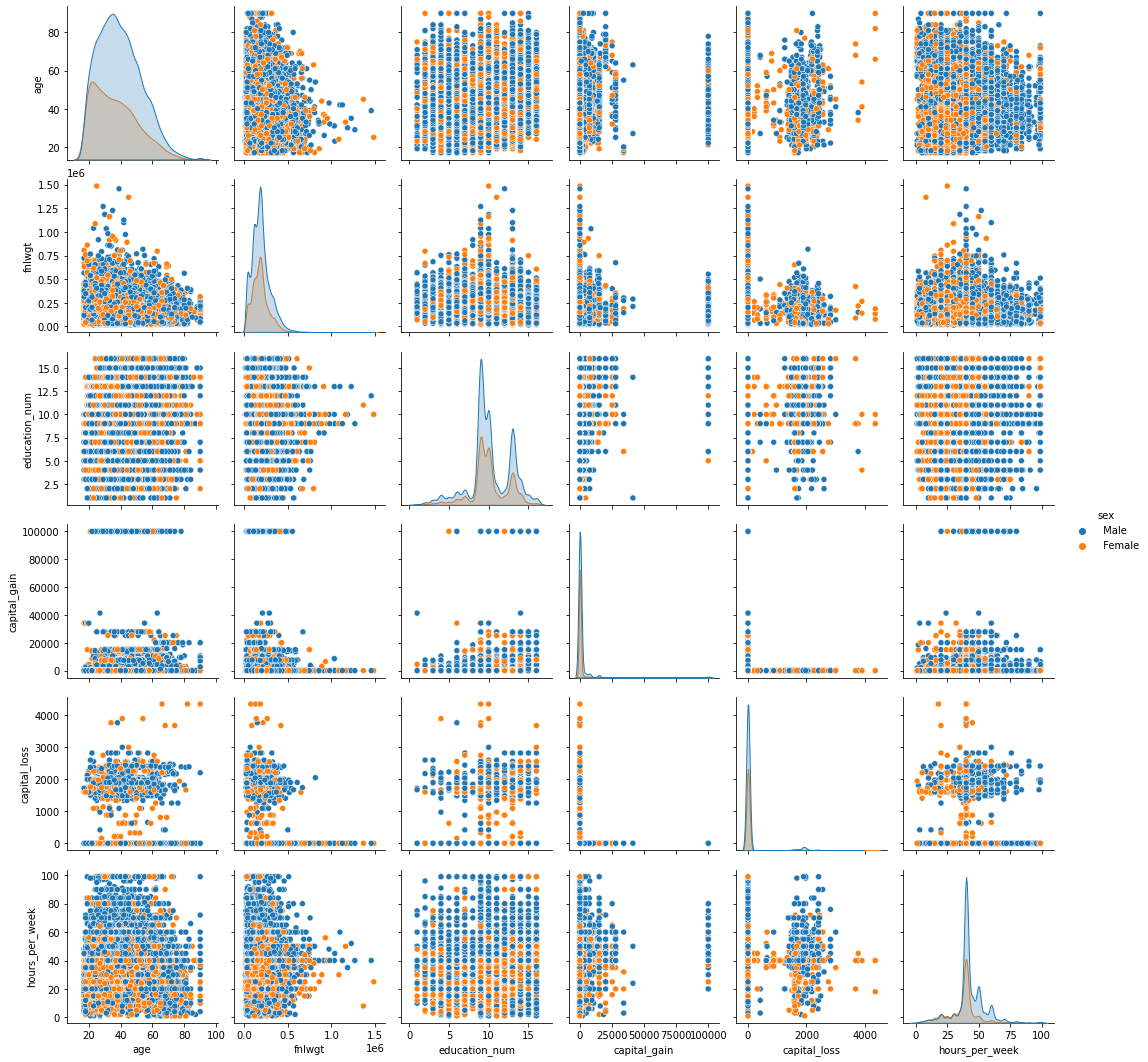

In [84]:
sns.pairplot(df, hue="sex")
plt.show()

In [86]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/Projects/Income Analysis & Classification/refined_income_evaluation.csv', encoding='utf-8')